In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Parameters


In [98]:
t_step = 0.01
t_last = 1000 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)
x = 0.5
y = 1
q = 0
p = 1
par = x,y,p,q
k = 0.1
gamma = 0.1
mu = 2
beta = 0.2
alpha = 1.0
count = 6
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)

# Van der Pol

<p>Calculating Period, Frequency, angular frequency and Amplitude for a changing alpha value (0-5)
because the Van der Pol Oscillator doesnt change its Oscillation behavior, the Period, Frequency,.. ect can be be calculate with more accuracy (more timesteps)</p>

if mu = 0.01, the period is 2π

for the Simulation, we gonna use mu = 2, to have this rectangular limit cycle

In [93]:
# vdp specific values
t_step_vdp = 0.01
t_last_vdp = 1000 # 1 point represent 1mHz
t_vdp = np.arange(0, 5000, t_step_vdp)
keep_vdp = int(t_last_vdp / t_step_vdp)
x_vdp = 0.5
y_vdp = 0.5
q_vdp = 0.5
p_vdp = 0.5
par_vdp = x,y,p,q
count_vdp = 10
vdp = OnesidedCoupling(par_vdp, t_vdp, keep_vdp, k, mu, gamma, alpha, beta)

In [94]:
period_vdp = lilie.period(count_vdp)[1]
f_vdp = 1/period_vdp
w_vdp = 2 * np.pi * f_vdp
amp_vdp = np.mean(lilie.find_peaks_max()[1][1]['peak_heights'][-count_vdp:])
time_amp_vdp = [t_vdp[i] for i in lilie.find_peaks_max()[1][0][-count_vdp:]]

print(period_vdp)
print(f_vdp)
print(w_vdp)
print(amp_vdp)
print(time_amp_vdp)


6.290999999999997
0.15895724050230495
0.9987577979938943
1.22389544962471e-21
[np.float64(942.89), np.float64(949.1800000000001), np.float64(955.47), np.float64(961.77), np.float64(968.0600000000001), np.float64(974.35), np.float64(980.64), np.float64(986.9300000000001), np.float64(993.22), np.float64(999.51)]


In [95]:
period_vdp = vdp.period(count_vdp)[0]
f_vdp = 1/period_vdp
w_vdp = 2 * np.pi * f_vdp
amp_vdp = np.mean(vdp.find_peaks_max()[0][1]['peak_heights'][-count_vdp:])
time_amp_vdp = [t_vdp[i] for i in vdp.find_peaks_max()[0][0][-count_vdp:]]

print(period_vdp)
print(f_vdp)
print(w_vdp)
print(amp_vdp)
print(time_amp_vdp)


7.6299999999999955
0.1310615989515073
0.8234843128675741
2.019889488960438
[np.float64(930.5500000000001), np.float64(938.1800000000001), np.float64(945.8100000000001), np.float64(953.44), np.float64(961.07), np.float64(968.7), np.float64(976.33), np.float64(983.96), np.float64(991.59), np.float64(999.22)]


## Solutions

In [74]:
xsol = lilie.x_solv()[:keep]
ysol = lilie.y_solv()[:keep]
psol = lilie.p_solv()[:keep]
qsol = lilie.q_solv()[:keep]


## Find Peaks

In [75]:
xmax = lilie.maximumofplot()[0]
ymax = lilie.maximumofplot()[1]
x_amplitude = lilie.find_peaks_max()[0]
y_amplitude = lilie.find_peaks_max()[1]

# Timeseries
showing the timeseries for Van der Pol Oscillator and Duffing oscillator with the Maximum peak of the Plot.

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 1.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


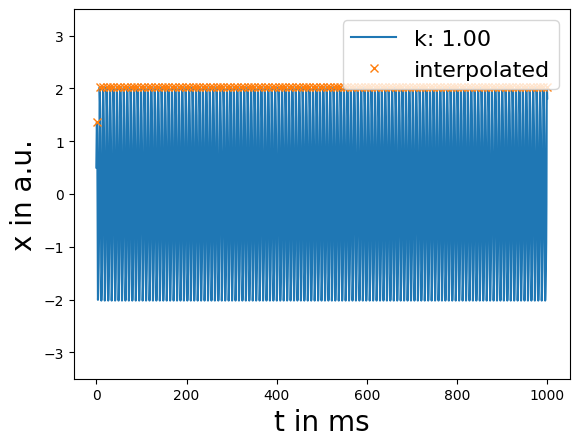

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 1.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


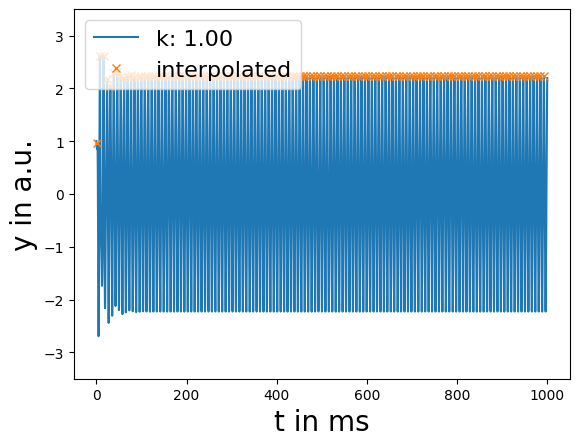

In [76]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "interpolated")
# plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "max peak")

plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in y_amplitude[0]], y_amplitude[1]['peak_heights'], "x", label = "interpolated")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

In [77]:
tx_plus = lilie.square_interpolation()[1][0]
ty_plus = lilie.square_interpolation()[1][1]
xing = lilie.square_interpolation()[0][0]
ying = lilie.square_interpolation()[0][1]

/Users/huyenanh/git_repos/daniel_model/ODE/onesidedcoupling.py:252: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(quadraticinterpolation, t[i][u], sol[i][u])


## Quadratic Interpolation

In [78]:
tx_plus = lilie.square_interpolation()[1][0]
ty_plus = lilie.square_interpolation()[1][1]
xing = lilie.square_interpolation()[0][0]
ying = lilie.square_interpolation()[0][1]

In [79]:
xing, x_amplitude[1]['peak_heights']

([np.float64(1.3554177097784343),
  np.float64(2.0198903548971288),
  np.float64(2.0198921003687076),
  np.float64(2.0198921012620303),
  np.float64(2.0198921062061572),
  np.float64(2.0198920531320255),
  np.float64(2.0198920483512666),
  np.float64(2.019892041683306),
  np.float64(2.0198920508983065),
  np.float64(2.0198920043576436),
  np.float64(2.0198920437833294),
  np.float64(2.0198920204529713),
  np.float64(2.0198913606891438),
  np.float64(2.0198921997962316),
  np.float64(2.0198877160364646),
  np.float64(2.0201819644862553),
  np.float64(2.019870858106515),
  np.float64(2.019877805512806),
  np.float64(2.0202698680077447),
  np.float64(2.0198610683291918),
  np.float64(2.019857738920109),
  np.float64(2.019861581400619),
  np.float64(2.019853697514918),
  np.float64(2.0198555411043344),
  np.float64(2.019792356056314),
  np.float64(2.019749106645577),
  np.float64(2.026623066049069),
  np.float64(2.019775434429903),
  np.float64(2.019842672858431),
  np.float64(2.0198407759

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 1.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


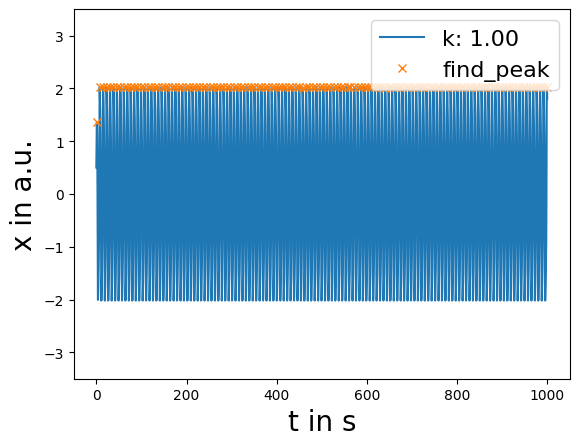

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 1.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


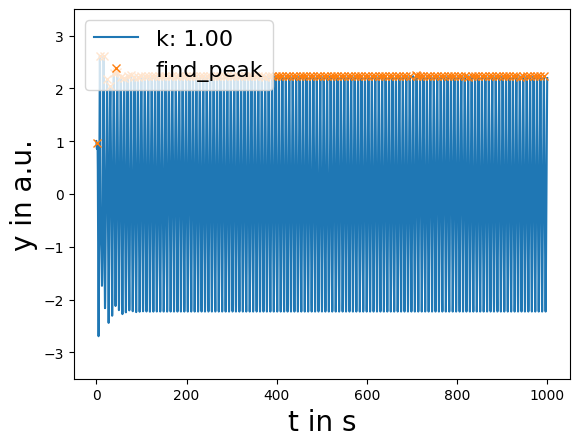

In [80]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot(tx_plus, xing, "x", label = "find_peak")
plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in s", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot(ty_plus, ying, "x", label = "find_peak")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in s", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

# Phasetime

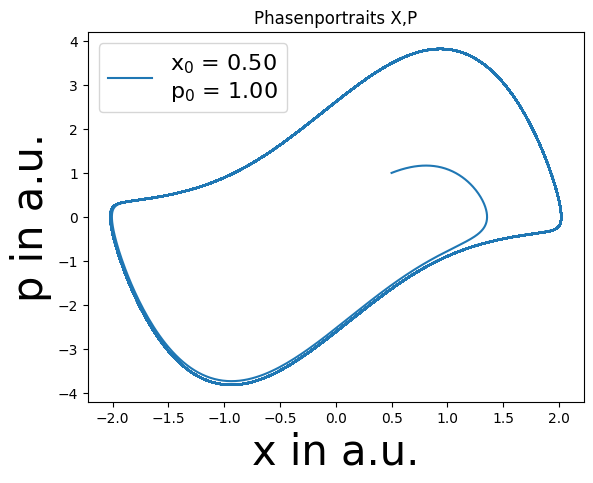

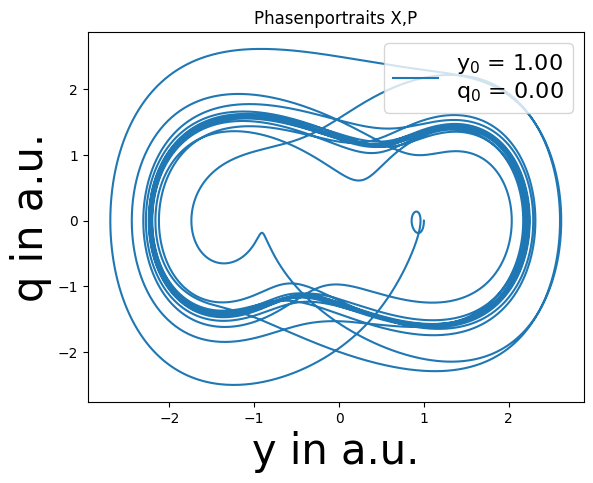

In [81]:

label = f"x$_0$ = {par[0]:.2f} \np$_0$ = {par[2]:.2f}"
plt.plot(xsol[-keep:],psol[-keep:],label = label)
plt.xlabel("x in a.u.",fontsize = 30)
plt.ylabel("p in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

label = f"y$_0$ = {par[1]:.2f} \nq$_0$ = {par[3]:.2f}"
plt.plot(ysol[-keep:],qsol[-keep:],label = label)
plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

# Resonance Curve

In [99]:
reso_alpha = np.arange(0.2, 4, 0.05)
omega = [np.sqrt(i) for i in reso_alpha]
revers_omega = [i for i in reversed(omega)]

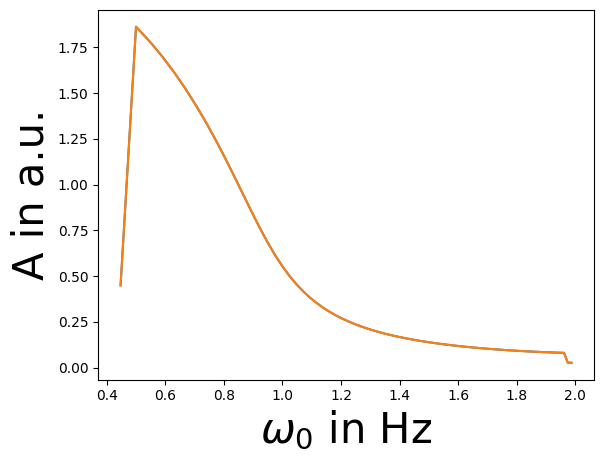

In [ ]:
# findpeaks
amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][1]['peak_heights'][-6:]) for i in reso_alpha]

time_amp = [t[k] for k in [OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][0][-10:] for i in reso_alpha]]

# reverse_amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][1]['peak_heights'][-6:]) for i in reversed(reso_alpha)]
plt.plot(omega, amp)
# plt.plot(revers_omega, reverse_amp)
plt.xlabel("$\omega _0$ in Hz", fontsize = 30)
plt.ylabel("A in a.u.",fontsize = 30)
plt.show()

# Phase difference

In [84]:
print(time_amp[0])
print(time_amp_vdp)



[955.41 960.89 964.19 969.44 974.62 978.3  983.78 987.08 992.33 997.51]
[np.float64(930.5500000000001), np.float64(938.1800000000001), np.float64(945.8100000000001), np.float64(953.44), np.float64(961.07), np.float64(968.7), np.float64(976.33), np.float64(983.96), np.float64(991.59), np.float64(999.22)]


In [85]:
phaseamp = [np.diff([time_amp_vdp,i], axis = 0)/period_vdp for i in time_amp]
print(phaseamp)

[array([[ 3.25819135,  2.97640891,  2.40891219,  2.09698558,  1.77588467,
         1.25819135,  0.97640891,  0.40891219,  0.09698558, -0.22411533]]), array([[ 3.24901704,  2.9921363 ,  2.39449541,  2.09567497,  1.81258191,
         1.24901704,  0.9921363 ,  0.39449541,  0.09567497, -0.18741809]]), array([[-0.87811271, -0.87811271, -0.87811271, -0.87811271, -0.87811271,
        -0.87811271, -0.87811271, -0.87811271, -0.87811271, -0.87811271]]), array([[-0.87811271, -0.87811271, -0.87811271, -0.87811271, -0.87811271,
        -0.87811271, -0.87811271, -0.87811271, -0.87811271, -0.87811271]]), array([[-0.87811271, -0.87811271, -0.87811271, -0.87811271, -0.87811271,
        -0.87811271, -0.87811271, -0.87811271, -0.87811271, -0.87811271]]), array([[-0.87811271, -0.87811271, -0.87811271, -0.87811271, -0.87811271,
        -0.87811271, -0.87811271, -0.87811271, -0.87811271, -0.87811271]]), array([[-0.87811271, -0.87811271, -0.87811271, -0.87811271, -0.87811271,
        -0.87811271, -0.87811271

In [86]:
phaseamp = [np.diff([time_amp_vdp[0],i[0]], axis = 0)/period_vdp for i in time_amp]
print(phaseamp)

[array([3.25819135]), array([3.24901704]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.87811271]), array([-0.8768021]), array([-0.8768021]), array([-0.8768021]), array([-0.8768021]), array([-0.8768021]), array([-0.8768021]), array([-0.8768021]), array([-0.8768021]), array([-0.87549148]), array([-0.87549148]), array([-0.87549148]), array([-0.87549148]), array([-0.87549148]), array([-0.87549148]), array([-0.87418087]), array([-0.87418087]), array([-0.87418087]

/var/folders/2q/qj12d6zd1qg4x5blqbp5z8fc0000gn/T/ipykernel_64778/2207337207.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 16, loc = "upper right")


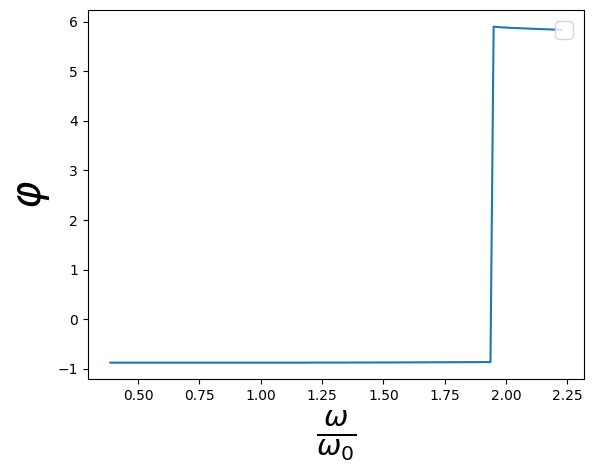

In [87]:
phaseamp = [np.diff([time_amp_vdp[0],i[0]], axis = 0)/period_vdp for i in time_amp]

plt.plot(omega[3:], phaseamp[3:])
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("$\\frac{\omega}{\omega _0}$", fontsize = 30)
plt.ylabel("$\\varphi$",fontsize = 30)
plt.show()

# Randomstuff

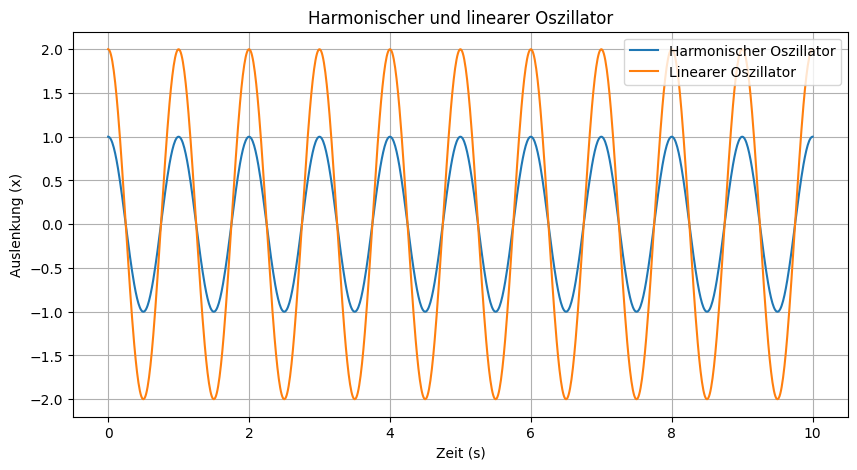

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter festlegen
A = 1  # Amplitude
omega = 2 * np.pi  # Kreisfrequenz (z.B. 1 Hz)
phi = 0  # Phasenverschiebung

# Zeitarray erstellen
t = np.linspace(0, 10, 1000)  # 2 Sekunden, 1000 Punkte

# Harmonischer Oszillator
x_harmonic = A * np.cos(omega * t + phi)

# Linearer Oszillator (z.B. Schwingungsgleichung)
A_lin = 2
x_linear = A_lin * np.exp(0 * omega * t) * np.cos(omega * t + phi)

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(t, x_harmonic, label='Harmonischer Oszillator')
plt.plot(t, x_linear, label='Linearer Oszillator')
plt.xlabel('Zeit (s)')
plt.ylabel('Auslenkung (x)')
plt.title('Harmonischer und linearer Oszillator')
plt.legend()
plt.grid(True)
plt.show()
